# Importing required libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pandas

In [3]:
!pip install seaborn

You should consider upgrading via the 'c:\users\harik\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import sys
!{sys.executable} -m pip install seaborn


In [5]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
#Database loading and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Data preprocessing / EDA

In [6]:
kidney_dataframe = pd.read_csv("chronic_kidney_disease.csv")
print('Shape of dataset: ' + str(kidney_dataframe.shape))
print('Total number of data = ' + str(kidney_dataframe.shape[0]))
print('Total number of attributes  = ' + str(kidney_dataframe.shape[1]))

Shape of dataset: (400, 25)
Total number of data = 400
Total number of attributes  = 25


In [7]:
kidney_dataframe

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,0,0,1,1,140,...,47,6700,4.9,1,1,1,1,1,1,notckd
396,42,70,1.025,0,0,0,0,1,1,75,...,54,7800,6.2,1,1,1,1,1,1,notckd
397,12,80,1.02,0,0,0,0,1,1,100,...,49,6600,5.4,1,1,1,1,1,1,notckd
398,17,60,1.025,0,0,0,0,1,1,114,...,51,7200,5.9,1,1,1,1,1,1,notckd


In [8]:
kidney_dataframe = kidney_dataframe.replace('?', np.nan)
    
#set the features and the target variables
target_class = kidney_dataframe['class']

feature_classes = kidney_dataframe.iloc[:, 0:24]
    
    
knn_missing_values_imputer = KNNImputer(n_neighbors=3)
feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)

    
    
#Scaling 
standard_scaler = StandardScaler()
feature_classes = standard_scaler.fit_transform(feature_classes)
feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane']) 
#Encoding target class 
target_encoder = preprocessing.LabelEncoder()
target_class = target_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['class'])  #0 for kidney disease , 1 for no ckd


    


In [9]:
#target_class1

In [10]:
kidney_dataframe.head(10) 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,NaN,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd
5,60,90,1.015,3,0,0,0,1,1,74,...,39,7800,4.4,0,0,1,1,0,1,ckd
6,68,70,1.01,0,0,0,0,1,1,100,...,36,0,0.0,1,1,1,1,1,1,ckd
7,24,NaN,1.015,2,4,0,1,1,1,410,...,44,6900,5.0,1,0,1,1,0,1,ckd
8,52,100,1.015,3,0,0,1,0,1,138,...,33,9600,4.0,0,0,1,1,1,0,ckd
9,53,90,1.02,2,0,1,1,0,1,70,...,29,12100,3.7,0,0,1,0,1,0,ckd


In [11]:
kidney_dataframe.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
kidney_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    object 
 1   bp      388 non-null    object 
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    object 
 10  bu      381 non-null    object 
 11  sc      383 non-null    object 
 12  sod     313 non-null    object 
 13  pot     312 non-null    object 
 14  hemo    348 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

# split the dataset

In [13]:

train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.70, test_size = 0.30,random_state=0)
print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


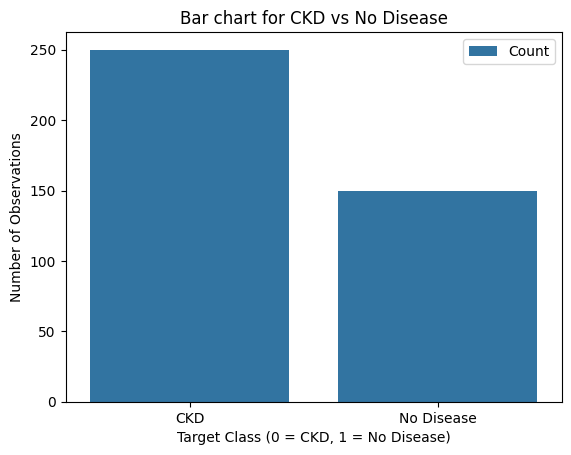

In [14]:
# Visualize counts of target class
sns.countplot(x=target_class1['class'], label="Count")

plt.title('Bar chart for CKD vs No Disease')
plt.xlabel('Target Class (0 = CKD, 1 = No Disease)')
plt.ylabel('Number of Observations')
plt.xticks([0, 1], ['CKD', 'No Disease'])  # Optional: label 0/1 more clearly
plt.show()

In [15]:
'''
n_jobs': [1, -1]-Controls how many CPU cores to use:
Value	Meaning
1	Use only 1 core — runs slower
-1	Use all available cores — runs faster 

'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']-Specifies the algorithm used to find nearest neighbors.
Value	Meaning
'auto'	Automatically selects the best algorithm based on data
'ball_tree'	Uses a Ball Tree data structure (good for low-dimensional data)
'kd_tree'	Uses a KD Tree (efficient for structured, low-dimensional features)
'brute'	Performs brute-force search (may be slower for large datasets)
'''

"\nn_jobs': [1, -1]-Controls how many CPU cores to use:\nValue\tMeaning\n1\tUse only 1 core — runs slower\n-1\tUse all available cores — runs faster \n\n'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']-Specifies the algorithm used to find nearest neighbors.\nValue\tMeaning\n'auto'\tAutomatically selects the best algorithm based on data\n'ball_tree'\tUses a Ball Tree data structure (good for low-dimensional data)\n'kd_tree'\tUses a KD Tree (efficient for structured, low-dimensional features)\n'brute'\tPerforms brute-force search (may be slower for large datasets)\n"

In [16]:
test_features.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
132,-0.074372,1.495105,-1.013693,0.755031,1.457546,-0.364890,-0.484322,0.360477,0.263664,0.901042,...,-1.283127,-0.471178,1.565596,-0.197080,-1.297907,0.741881,0.323994,0.511693,-2.048122,-2.357409
309,-0.016117,-1.216544,0.497027,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.266475,...,1.742618,0.473244,0.428440,1.156987,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
341,0.682944,-0.477004,1.403459,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.253502,...,0.405661,0.532270,0.250063,0.649212,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
196,-0.132627,1.741618,-1.315838,1.526783,-0.436396,2.740554,2.064742,0.360477,0.263664,-0.266475,...,-1.459043,-0.471178,0.762898,0.141437,-1.297907,-1.347925,0.323994,-1.954297,-2.048122,-2.357409
246,-0.190883,2.481159,-0.409405,1.526783,-0.436396,2.740554,-0.484322,-2.774104,0.263664,-0.564840,...,-1.283127,-0.353125,-0.262772,-0.281709,-1.297907,0.741881,-3.086473,0.511693,0.488252,-2.357409
60,0.915964,1.002078,0.497027,-0.016721,-0.436396,-0.364890,2.064742,-2.774104,0.263664,-0.110806,...,-0.696742,-1.887811,-1.377631,-1.339575,-1.297907,0.741881,0.323994,0.511693,0.488252,0.424195
155,-0.074372,-0.477004,0.497027,1.526783,-0.436396,2.740554,-0.484322,-2.774104,-3.792706,-0.344309,...,-0.403550,0.237138,-0.329664,-1.339575,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
261,-0.132627,0.262537,0.497027,-0.788474,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.357282,...,1.672252,0.532270,-0.128989,0.733841,0.770471,0.741881,0.323994,0.511693,0.488252,0.424195
141,0.915964,-0.477004,-1.315838,-0.016721,-0.436396,-0.364890,-0.484322,0.360477,0.263664,-0.724833,...,-2.162705,-0.766310,0.071685,-1.339575,-1.297907,0.741881,0.323994,0.511693,0.488252,-2.357409
214,0.974220,0.262537,-0.409405,-0.788474,-0.436396,-0.364890,2.064742,0.360477,0.263664,0.278366,...,0.511210,0.650323,-0.285069,0.860785,0.770471,-1.347925,0.323994,0.511693,0.488252,0.424195


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

In [20]:
#Evaluation function for models
from sklearn import metrics
model_scores = []
best_model = None
best_model_name = None
best_score = -1
def evaluate_model(model, test_features, test_target, model_name):
    global best_model, best_model_name, best_score
    prediction = model.predict(test_features)
    acc = metrics.accuracy_score(test_target, prediction)
    prec = metrics.precision_score(test_target, prediction)
    rec = metrics.recall_score(test_target, prediction)
    f1 = metrics.f1_score(test_target, prediction)
    model_scores.append({"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1, "ModelObject": model})

    if f1 > best_score:
        best_score = f1
        best_model = model
        best_model_name = model_name

    print(f'\n==== {model_name} ====')
    print('Precision:', prec)
    print('Accuracy:', acc)
    print('Recall:', rec)
    print('F1-score:', f1)
    print('\nClassification Report:\n', metrics.classification_report(test_target, prediction))
    print('\nConfusion Matrix:\n', metrics.confusion_matrix(test_target, prediction))
    sns.heatmap(metrics.confusion_matrix(test_target, prediction), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


Best KNN Params: {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 2, 'weights': 'uniform'}

==== K-Nearest Neighbor ====
Precision: 0.9787234042553191
Accuracy: 0.975
Recall: 0.9583333333333334
F1-score: 0.968421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Confusion Matrix:
 [[71  1]
 [ 2 46]]


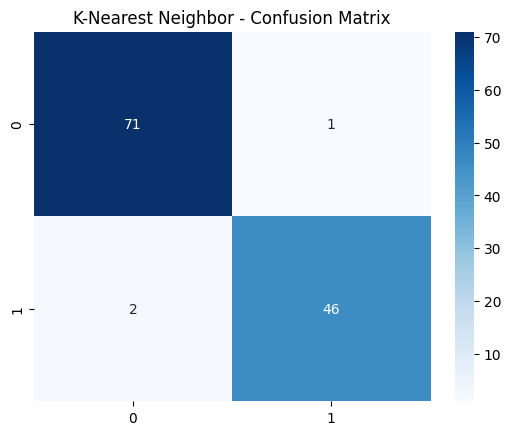

In [21]:

# 0. K-Nearest Neighbors with GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_parameters_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [1, -1]
}
knn_grid_search = GridSearchCV(knn_model, knn_parameters_grid, scoring='accuracy')
knn_grid_search.fit(train_features, train_target)
print("Best KNN Params:", knn_grid_search.best_params_)
evaluate_model(knn_grid_search, test_features, test_target, "K-Nearest Neighbor")



Best Decision Tree Params: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 5, 'splitter': 'best'}

==== Decision Tree ====
Precision: 0.9574468085106383
Accuracy: 0.9583333333333334
Recall: 0.9375
F1-score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120


Confusion Matrix:
 [[70  2]
 [ 3 45]]


c:\Users\harik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\harik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\harik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\harik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

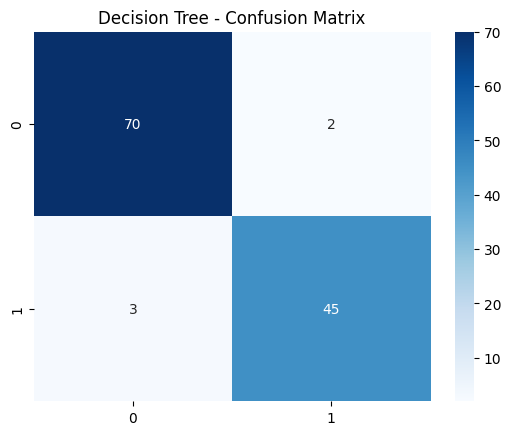

In [22]:

# 1. Decision Tree with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt_parameters_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=0), dt_parameters_grid, scoring='accuracy')
dt_model.fit(train_features, train_target)
print("Best Decision Tree Params:", dt_model.best_params_)
evaluate_model(dt_model, test_features, test_target, "Decision Tree")


Best Logistic Regression Params: {'C': 10, 'solver': 'lbfgs'}

==== Logistic Regression ====
Precision: 0.9791666666666666
Accuracy: 0.9833333333333333
Recall: 0.9791666666666666
F1-score: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


Confusion Matrix:
 [[71  1]
 [ 1 47]]


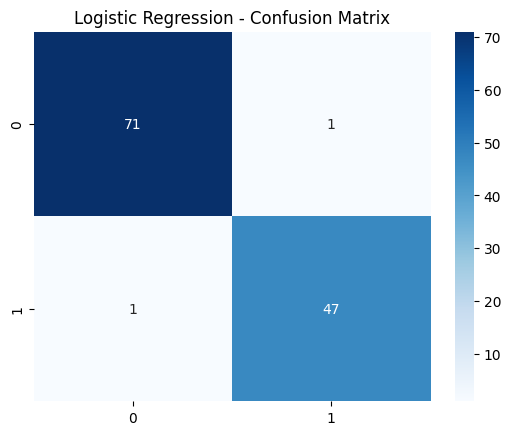

In [23]:
# 2. Logistic Regression with GridSearchCV
from sklearn.linear_model import LogisticRegression
log_param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
log_model = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, scoring='accuracy')
log_model.fit(train_features, train_target)
print("Best Logistic Regression Params:", log_model.best_params_)
evaluate_model(log_model, test_features, test_target, "Logistic Regression")

Best Random Forest Params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}

==== Random Forest ====
Precision: 1.0
Accuracy: 0.9916666666666667
Recall: 0.9791666666666666
F1-score: 0.9894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Confusion Matrix:
 [[72  0]
 [ 1 47]]


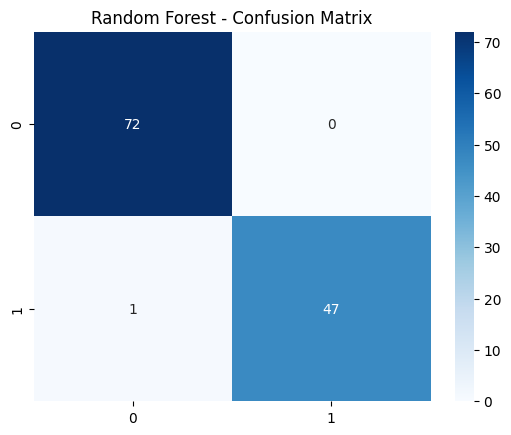

In [24]:

# 3. Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='accuracy')
rf_model.fit(train_features, train_target)
print("Best Random Forest Params:", rf_model.best_params_)
evaluate_model(rf_model, test_features, test_target, "Random Forest")


Best AdaBoost Params: {'learning_rate': 1.0, 'n_estimators': 100}

==== AdaBoost ====
Precision: 0.9795918367346939
Accuracy: 0.9916666666666667
Recall: 1.0
F1-score: 0.9896907216494846

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Confusion Matrix:
 [[71  1]
 [ 0 48]]


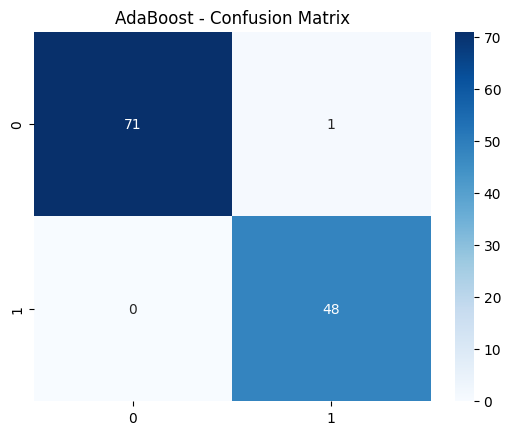

In [25]:

# 4. AdaBoost with GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
ada_model = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, scoring='accuracy')
ada_model.fit(train_features, train_target)
print("Best AdaBoost Params:", ada_model.best_params_)
evaluate_model(ada_model, test_features, test_target, "AdaBoost")


Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

==== Support Vector Machine ====
Precision: 1.0
Accuracy: 0.9833333333333333
Recall: 0.9583333333333334
F1-score: 0.9787234042553191

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


Confusion Matrix:
 [[72  0]
 [ 2 46]]


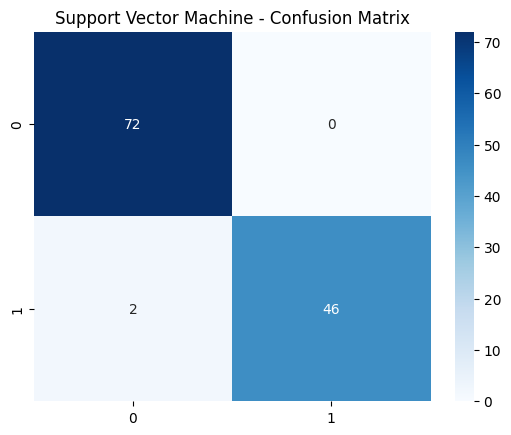

In [26]:

# 5. Support Vector Machine with GridSearchCV
from sklearn.svm import SVC
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_model = GridSearchCV(SVC(probability=True), svm_param_grid, scoring='accuracy')
svm_model.fit(train_features, train_target)
print("Best SVM Params:", svm_model.best_params_)
evaluate_model(svm_model, test_features, test_target, "Support Vector Machine")

In [27]:

# 🔍 Compare All Models
comparison_df = pd.DataFrame(model_scores)
print("\n=== Model Comparison Table ===")
print(comparison_df.sort_values(by='F1 Score', ascending=False))

# 💾 Save only the best performing model
joblib.dump(best_model.best_estimator_, 'best_ckd_model.pkl')
print("\nBest model saved as best_ckd_model.pkl")
print(f"\nBest Model: {best_model_name}")



=== Model Comparison Table ===
                    Model  Accuracy  Precision    Recall  F1 Score  \
4                AdaBoost  0.991667   0.979592  1.000000  0.989691   
3           Random Forest  0.991667   1.000000  0.979167  0.989474   
2     Logistic Regression  0.983333   0.979167  0.979167  0.979167   
5  Support Vector Machine  0.983333   1.000000  0.958333  0.978723   
0      K-Nearest Neighbor  0.975000   0.978723  0.958333  0.968421   
1           Decision Tree  0.958333   0.957447  0.937500  0.947368   

                                         ModelObject  
4  GridSearchCV(estimator=AdaBoostClassifier(rand...  
3  GridSearchCV(estimator=RandomForestClassifier(...  
2  GridSearchCV(estimator=LogisticRegression(max_...  
5  GridSearchCV(estimator=SVC(probability=True),\...  
0  GridSearchCV(estimator=KNeighborsClassifier(),...  
1  GridSearchCV(estimator=DecisionTreeClassifier(...  

Best model saved as best_ckd_model.pkl

Best Model: AdaBoost
